$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

#Que.1

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



#Answer:

$f(x)$ can be written as $f(x)=x_1^2+x_2^2+200x_1-50x_2+10625$

If we take $ A=\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix} \\ b=\begin{bmatrix}
100\\
-25
\end{bmatrix} \\ c=10625 \\ \text{and} \  x=\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}$

Then $f(x)$ can be written in the form $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c.$

#Que.2
$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

#Answer:
As we show in the above question that the given $f(x)$ can be written of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$.

now $$x-α∇f(x)= \begin{bmatrix}
x_1\\
x_2
\end{bmatrix}-\alpha\begin{bmatrix}
2(x_1+100)\\
2(x_2-25)
\end{bmatrix}\\
⇒x-α∇f(x)=\begin{bmatrix}
x_1(1-2\alpha)-200\alpha\\
x_2(1-2\alpha)+50\alpha
\end{bmatrix}\\
$$
Now $f(\begin{bmatrix}
x_1(1-2\alpha)-200\alpha\\
x_2(1-2\alpha)+50\alpha
\end{bmatrix})= (x_1(1-2α)-200\alpha+100)^2+(x_2(1-2α)+50\alpha-25)^2$

To find the minimum, we differentiate it with respect to $α$ and put it equal to zero.

Diffferentiating $ f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ with respect to $α$

$\frac{d(f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}{dα}=-2(x_1(1-2α)-200α+100)(2x_1+200)+2(x_2(1-2α)+50α-25)(-2x_2+50)\\ $

$\frac{d(f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}{dα}$ vanishes at $α=0.5$

Hence,$f(\mathbf{x} - \alpha \nabla f(\mathbf{x})$ will be minimum for $α=0.5$


We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [16]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [17]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [18]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [19]:
#Complete the module to compute the steplength
def compute_steplength(g,x):
  s_l=1
  a=10**(-4)
  r=0.5
  while evalf(x-s_l*g) > (evalf(x)-(a*s_l*np.linalg.multi_dot([g,g]))):
    s_l=r*s_l
  return s_l

In [20]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(g_x,x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 


In [21]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


(array([-100.,   25.]), 1)

#Que.4

In [22]:
list_of_tolerance=[10**(-p) for p in range(1,11)]
no_of_iterations=[]
for t in list_of_tolerance:
  opt_x,iterations=find_minimizer(my_start_x,t)
  no_of_iterations.append(iterations)


iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.

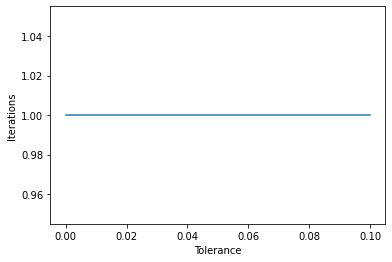

In [23]:
import matplotlib.pyplot as plt
plt.plot(list_of_tolerance,no_of_iterations)
plt.ylabel('Iterations')
plt.xlabel('Tolerance')
plt.show()

Here,number of iterations doesn't change with tolerance but in exercise 1(in case of fixed step length) number of iterations decreases as tolerance increases.